### Exchange rate
___

In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date

currencies = ['CAD=X','PEN=X']

variables = currencies
start = datetime.datetime(2021,4,1)
end = datetime.datetime(2019,1,31)

df_daily_quote = yf.download(variables,start)['Adj Close']
# df_daily_quote['CAD=X'] = df_daily_quote['CAD=X']
df_daily_quote['CADPEN'] = df_daily_quote['PEN=X']*df_daily_quote['CAD=X']**(-1)
df_daily_quote = df_daily_quote.fillna(method="bfill")
df_daily_quote = df_daily_quote.fillna(method="ffill")

HPR = (df_daily_quote.pct_change()+1).cumprod()-1
display(df_daily_quote)

# Plot
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(rows=3, cols=1,
                    specs=[
                           [{"secondary_y": True}], 
                           [{"secondary_y": True}],
                           [{"secondary_y": True}],
                          #  [{"secondary_y": True}],
                          ],                 
                    shared_xaxes=True,
                    vertical_spacing=0.05,
                   )


# fig.add_trace(go.Scatter(x=HPR.index, y=HPR['BZ=F'], name="Brent Oil",stackgroup='one' ),row=1, col=1, secondary_y=False,)

fig.add_trace(go.Scatter(x=df_daily_quote.index, y=df_daily_quote['CAD=X'], name="USDCAD",),row=1, col=1, secondary_y=False,)
fig.add_trace(go.Scatter(x=df_daily_quote.index, y=df_daily_quote['PEN=X'], name="USDPEN",),row=1, col=1, secondary_y=True,)

fig.add_trace(go.Scatter(x=df_daily_quote.index, y=df_daily_quote['CADPEN'], name="CADPEN",),row=2, col=1, secondary_y=True,)
fig.add_trace(go.Scatter(x=HPR.index, y=HPR['CADPEN'], name="CADPEN",),row=2, col=1, secondary_y=False,)

fig.add_trace(go.Scatter(x=HPR.index, y=HPR['CAD=X'], name="USDCAD",),row=3, col=1, secondary_y=False,)
fig.add_trace(go.Scatter(x=HPR.index, y=HPR['PEN=X'], name="USDPEN",),row=3, col=1, secondary_y=False,)

# fig.add_trace(go.Scatter(x=HPR.index, y=HPR['IMO.TO'], name="Imperial Oil Limited",),row=1, col=1, secondary_y=False,)

fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=False)
fig.update_layout(height=800,
                  # margin=dict(t=130, b=0, l=70, r=40),
                  hovermode="x unified", 
                  xaxis_title=' ', yaxis_title=" ",
                  # plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  template='plotly_dark',
                  title="Cross currencies PEN, CAD, USD",
                  title_font_size=20,
                  legend_title_text='Financials'
                  # legend=dict(orientation="h", yanchor="bottom", y=1.2, xanchor="left", x=0.45)
                 )

[*********************100%***********************]  2 of 2 completed


CAD=X     PEN=X    CADPEN
Date                                   
2021-04-01  1.25643  3.742000  2.978280
2021-04-02  1.25460  3.735000  2.977044
2021-04-05  1.25640  3.741000  2.977555
2021-04-06  1.25202  3.671390  2.932373
2021-04-07  1.25714  3.624053  2.882776
...             ...       ...       ...
2023-03-20  1.37098  3.662353  2.671339
2023-03-21  1.36710  3.715444  2.717756
2023-03-22  1.37088  3.703683  2.701683
2023-03-23  1.37167  3.708424  2.703583
2023-03-24  1.37352  3.763400  2.739967

[517 rows x 3 columns]

In [32]:
import pandas as pd

data = {
    'A': [10, 20, 30, 40, 50, 60, 70],
    'B': [1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7],
    'C': ['a', 'b', 'c', 'd', 'e', 'f', 'g'],
    'D': ['X', 'Y', 'Z', 'X', 'Y', 'Z', 'X']
}

df = pd.DataFrame(data)
# df= df.iloc[3,2]
df= df.loc[0:2,'C']
df

0    a
1    b
2    c
Name: C, dtype: object

In [34]:
!pip install pytz
import pytz

def get_timezones_by_city(city):
    try:
        timezones = pytz.timezone(city)
        timezone_name = timezones.zone
        print(f"El huso horario de {city} es: {timezone_name}")
        print("Ciudades en el mundo con el mismo huso horario:")
        for tz_name in pytz.common_timezones:
            tz = pytz.timezone(tz_name)
            if tz_name != timezone_name and tz.utcoffset(None) == timezones.utcoffset(None):
                print(tz_name)
    except pytz.exceptions.UnknownTimeZoneError:
        print(f"No se encontró información para la ciudad {city}.")

if __name__ == "__main__":
    city = input("Ingresa el nombre de una ciudad: ")
    get_timezones_by_city(city)


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Ingresa el nombre de una ciudad: Winnipeg
No se encontró información para la ciudad Winnipeg.


### Main market indexes
___

In [24]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date

indices = {
    "Tecnología": {"name": "NASDAQ Composite", "ticker": "^IXIC"},
    "Salud": {"name": "S&P 500 Health Care", "ticker": "^SP500-35"},
    "Energía": {"name": "S&P 500 Energy", "ticker": "^GSPE"},
    "Finanzas": {"name": "Dow Jones U.S. Financials Index", "ticker": "^DJUSFN"},
    "Bienes raíces": {"name": "S&P 500 Real Estate", "ticker": "^SP500-60"},
    "Materias primas": {"name": "S&P-GSCI Commodity Index Future", "ticker": "GD=F"},
    "Industria alimentaria": {"name": "S&P Food & Beverage Select Industry Index", "ticker": "^SPSIFBTR"},
    "Transporte": {"name": "Dow Jones Transportation Average", "ticker": "^DJT"},
    "Telecomunicaciones": {"name": "S&P 500 Telecom Services", "ticker": "^SP500-50"},
    "Industria manufacturera": {"name": "S&P 500 Industrials", "ticker": "^SP500-20"},
    "Minoristas": {"name": "S&P Retail Select Industry Index", "ticker": "^SPSIRE"}
}

df = pd.DataFrame.from_dict(indices, orient="index")
index_list = df['ticker'].tolist()

variables = index_list
start = datetime.datetime(2021,4,1)
end = datetime.datetime(2019,1,31)

df_daily_quote = yf.download(variables,start)['Adj Close']
df_daily_quote = df_daily_quote.fillna(method="bfill")
df_daily_quote = df_daily_quote.fillna(method="ffill")
HPR = (df_daily_quote.pct_change()+1).cumprod()-1
display(df_daily_quote)

# Plot
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(rows=1, cols=1,
                    specs=[
                           [{"secondary_y": True}], 
                          #  [{"secondary_y": True}],
                          #  [{"secondary_y": True}],
                          #  [{"secondary_y": True}],
                          ],                 
                    shared_xaxes=True,
                    vertical_spacing=0.05,
                   )


for n in range(0,len(HPR.columns)):
    fig.add_trace(go.Scatter(x=HPR.index, y=HPR[HPR.columns[n]], name=df.loc[df['ticker']==HPR.columns[n], 'name'].values[0]),row=1, col=1, secondary_y=False,)

fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=False)
fig.update_layout(hovermode="x unified",
                  height=800,
                  # margin=dict(t=130, b=0, l=70, r=40), 
                  xaxis_title=' ', yaxis_title=" ",
                  # plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  template='plotly_dark',
                  title="Stock exchanges performance", 
                  title_font_size=20,
                  legend_title_text='Financials'
                  # legend=dict(orientation="h", yanchor="bottom", y=1.2, xanchor="left", x=0.45)
                 )

[*********************100%***********************]  11 of 11 completed


GD=F          ^DJT     ^DJUSFN       ^GSPE         ^IXIC  \
Date                                                                         
2021-04-01  474.149994  14748.379883  674.940002  379.709991  13480.110352   
2021-04-05  466.200012  14891.200195  674.940002  370.570007  13705.589844   
2021-04-06  468.600006  14842.940430  674.940002  369.600006  13698.379883   
2021-04-07  469.350006  14796.639648  674.940002  371.230011  13688.839844   
2021-04-08  472.899994  14787.959961  674.940002  366.170013  13829.309570   
...                ...           ...         ...         ...           ...   
2023-03-20  542.099976  13764.709961  674.940002  596.979980  11675.540039   
2023-03-21  546.200012  13993.969727  674.940002  617.599976  11860.110352   
2023-03-22  551.400024  13709.709961  674.940002  604.559998  11669.959961   
2023-03-23  549.000000  13687.679688  674.940002  596.320007  11787.400391   
2023-03-24  549.000000  13706.589844  674.940002  598.030029  11823.959961   

             ^SP500-20    ^SP500-35   ^SP500-50   ^SP500-60     ^SPSIFBTR  \
Date                                                                        
2021-04-01  835.289978  1357.400024  244.199997  250.899994  10456.519531   
2021-04-05  845.869995  1366.349976  249.750000  252.419998  10456.519531   
2021-04-06  843.630005  1361.459961  249.919998  252.869995  10456.519531   
2021-04-07  839.890015  1358.170044  251.729996  253.240005  10456.519531   
2021-04-08  841.630005  1359.719971  251.529999  251.809998  10456.519531   
...                ...          ...         ...         ...           ...   
2023-03-20  826.059998  1481.550049  183.440002  228.779999  10456.519531   
2023-03-21  835.380005  1490.339966  187.929993  227.210007  10456.519531   
2023-03-22  819.460022  1468.050049  184.880005  219.029999  10456.519531   
2023-03-23  817.609985  1465.449951  188.270004  217.839996  10456.519531   
2023-03-24  820.479980  1484.650024  188.770004  223.610001  10456.519531   

                ^SPSIRE  
Date                     
2021-04-01  6364.490234  
2021-04-05  6364.490234  
2021-04-06  6364.490234  
2021-04-07  6364.490234  
2021-04-08  6364.490234  
...                 ...  
2023-03-20  6364.490234  
2023-03-21  6364.490234  
2023-03-22  6364.490234  
2023-03-23  6364.490234  
2023-03-24  6364.490234  

[499 rows x 11 columns]

In [30]:
import pandas as pd

metals = {
    "Cobre": {"name": "Copper", "ticker": "HG=F"},
    "Hierro": {"name": "Iron ore", "ticker": "VALE"},
    "Aluminio": {"name": "Aluminum", "ticker": "ALI=F"},
    "Litio": {"name": "Lithium", "ticker": "SGML"},
#     "Plomo": {"name": "Lead", "ticker": "LEAD=F"},
#     "Niquel": {"name": "Nickel", "ticker": "NIKL.ME"},
#     "Estaño": {"name": "Tin", "ticker": "TIN=F"},
    "Zinc": {"name": "Zinc", "ticker": "ZN=F"}
}

df = pd.DataFrame.from_dict(metals, orient="index")
index_list = df['ticker'].tolist()

variables = index_list
start = datetime.datetime(2021,4,1)
end = datetime.datetime(2019,1,31)

df_daily_quote = yf.download(variables,start)['Adj Close']
df_daily_quote = df_daily_quote.fillna(method="bfill")
df_daily_quote = df_daily_quote.fillna(method="ffill")
HPR = (df_daily_quote.pct_change()+1).cumprod()-1
display(df_daily_quote)

# Plot
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(rows=1, cols=1,
                    specs=[
                           [{"secondary_y": True}], 
                          #  [{"secondary_y": True}],
                          #  [{"secondary_y": True}],
                          #  [{"secondary_y": True}],
                          ],                 
                    shared_xaxes=True,
                    vertical_spacing=0.05,
                   )


for n in range(0,len(HPR.columns)):
    fig.add_trace(go.Scatter(x=HPR.index, y=HPR[HPR.columns[n]], name=df.loc[df['ticker']==HPR.columns[n], 'name'].values[0]),row=1, col=1, secondary_y=False,)

fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=False)
fig.update_layout(hovermode="x unified",
                  height=800,
                  # margin=dict(t=130, b=0, l=70, r=40), 
                  xaxis_title=' ', yaxis_title=" ",
                  # plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  template='plotly_dark',
                  title="Stock exchanges performance", 
                  title_font_size=20,
                  legend_title_text='Financials'
                  # legend=dict(orientation="h", yanchor="bottom", y=1.2, xanchor="left", x=0.45)
                 )

[*********************100%***********************]  5 of 5 completed


ALI=F    HG=F       SGML       VALE        ZN=F
Date                                                         
2021-04-01  2234.50  4.0035   4.100000  14.085825  131.421875
2021-04-05  2234.50  4.1490   4.080000  15.040237  131.109375
2021-04-06  2273.75  4.1265   4.080000  15.064918  131.687500
2021-04-07  2266.25  4.0640   4.100000  15.344662  131.828125
2021-04-08  2290.50  4.1035   4.106000  15.492760  132.000000
...             ...     ...        ...        ...         ...
2023-03-20  2240.50  3.9755  36.500000  15.860000  114.593750
2023-03-21  2243.75  4.0185  35.270000  15.720000  113.640625
2023-03-22  2266.25  4.0685  34.529999  15.540000  113.718750
2023-03-23  2298.50  4.1460  32.900002  14.950000  115.984375
2023-03-24  2336.75  4.0730  33.540001  14.950000  116.109375

[502 rows x 5 columns]

### Stock market indexes
___

In [10]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date

indexes = ['^FCHI','^GSPC','^N225','^GDAXI','^GSPTSE','^FTSE','^HSI','^VIX']

variables = indexes
start = datetime.datetime(2021,4,1)
end = datetime.datetime(2019,1,31)

df_daily_quote = yf.download(variables,start)['Adj Close']
# df_daily_quote['CAD=X'] = df_daily_quote['CAD=X']
# df_daily_quote['CADPEN'] = df_daily_quote['PEN=X']*df_daily_quote['CAD=X']**(-1)
df_daily_quote = df_daily_quote.fillna(method="bfill")
df_daily_quote = df_daily_quote.fillna(method="ffill")

HPR = (df_daily_quote.pct_change()+1).cumprod()-1
display(df_daily_quote)

# Plot
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(rows=1, cols=1,
                    specs=[
                           [{"secondary_y": True}], 
                          #  [{"secondary_y": True}],
                          #  [{"secondary_y": True}],
                          #  [{"secondary_y": True}],
                          ],                 
                    shared_xaxes=True,
                    vertical_spacing=0.05,
                   )


# fig.add_trace(go.Scatter(x=HPR.index, y=HPR['BZ=F'], name="Brent Oil",stackgroup='one' ),row=1, col=1, secondary_y=False,)
# fig.add_trace(go.Bar(x=df_daily_quote.index, y=df_daily_quote['^VIX'], name="Terror index",),row=1, col=1, secondary_y=False,)
# fig.add_trace(go.Scatter(x=df_daily_quote.index, y=df_daily_quote['^VIX'], name="Paris",),row=2, col=1, secondary_y=False,)

fig.add_trace(go.Scatter(x=HPR.index, y=HPR['^FCHI'], name="Paris",),row=1, col=1, secondary_y=True,)
fig.add_trace(go.Scatter(x=HPR.index, y=HPR['^GSPC'], name="New York",),row=1, col=1, secondary_y=True,)
fig.add_trace(go.Scatter(x=HPR.index, y=HPR['^N225'], name="Tokyo",),row=1, col=1, secondary_y=True,)
fig.add_trace(go.Scatter(x=HPR.index, y=HPR['^GDAXI'], name="Frankfurt",),row=1, col=1, secondary_y=True,)
fig.add_trace(go.Scatter(x=HPR.index, y=HPR['^GSPTSE'], name="Toronto",),row=1, col=1, secondary_y=True,)
fig.add_trace(go.Scatter(x=HPR.index, y=HPR['^FTSE'], name="Londres",),row=1, col=1, secondary_y=True,)
fig.add_trace(go.Scatter(x=HPR.index, y=HPR['^HSI'], name="Taipei",),row=1, col=1, secondary_y=True,)


# fig.add_trace(go.Scatter(x=HPR.index, y=HPR['^VIX'], name="Imperial Oil Limited",),row=1, col=1, secondary_y=False,)

fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=False)
fig.update_layout(hovermode="x unified",
                  height=800,
                  # margin=dict(t=130, b=0, l=70, r=40), 
                  xaxis_title=' ', yaxis_title=" ",
                  # plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  template='plotly_dark',
                  title="Stock exchanges performance", 
                  title_font_size=20,
                  legend_title_text='Financials'
                  # legend=dict(orientation="h", yanchor="bottom", y=1.2, xanchor="left", x=0.45)
                 )

[*********************100%***********************]  8 of 8 completed


^FCHI        ^FTSE        ^GDAXI        ^GSPC       ^GSPTSE  \
Date                                                                            
2021-04-01  6102.959961  6737.299805  15107.169922  4019.870117  18990.300781   
2021-04-02  6131.339844  6823.600098  15212.679688  4077.909912  19026.800781   
2021-04-05  6131.339844  6823.600098  15212.679688  4077.909912  19026.800781   
2021-04-06  6131.339844  6823.600098  15212.679688  4073.939941  19104.099609   
2021-04-07  6130.660156  6885.299805  15176.360352  4079.949951  19129.099609   
...                 ...          ...           ...          ...           ...   
2023-03-20  7013.140137  7403.899902  14933.379883  3951.570068  19519.400391   
2023-03-21  7112.910156  7536.200195  15195.339844  4002.870117  19654.900391   
2023-03-22  7131.120117  7566.799805  15216.190430  3936.969971  19532.800781   
2023-03-23  7139.250000  7499.600098  15210.389648  3948.719971  19459.900391   
2023-03-24  7015.100098  7405.500000  14957.230469  3970.989990  19501.500000   

                    ^HSI         ^N225       ^VIX  
Date                                               
2021-04-01  28938.740234  29388.869141  17.330000  
2021-04-02  28674.800781  29854.000000  17.910000  
2021-04-05  28674.800781  30089.250000  17.910000  
2021-04-06  28674.800781  29696.630859  18.120001  
2021-04-07  28674.800781  29730.789062  17.160000  
...                  ...           ...        ...  
2023-03-20  19000.710938  26945.669922  24.150000  
2023-03-21  19258.759766  27466.609375  21.379999  
2023-03-22  19591.429688  27466.609375  22.260000  
2023-03-23  20049.640625  27419.609375  22.610001  
2023-03-24  19915.679688  27385.250000  21.740000  

[517 rows x 8 columns]

In [3]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date

# indexes = ['AAPL', 'META','GOOG','NFLX','AMZN','MSFT'] Tech
indexes = ['BPY', 'PLD','SPG','CBRE','DRE','EQR','AVB','ESS','PSA','VTR','VNQ'] # Real Estate
# indexes = ['PLTR', 'SNOW','AYX','SPLK','DDOG','CLDR','DATA','ZM','WDAY'] # Data analysysi
# indexes = ['XLK', '^TTFS'] #,'XLF','XLY','XLV 

# Select Sector SPDR Fund (XLK)
# Industrial Select Sector SPDR Fund (XLI)
# Financial Select Sector SPDR Fund (XLF)
# Consumer Discretionary Select Sector SPDR Fund (XLY)
# Health Care Select Sector SPDR Fund (XLV)

n = len(indexes)


variables = indexes
start = datetime.datetime(2020,4,1)
end = datetime.datetime(2019,1,31)

df_daily_quote = yf.download(variables,start)['Adj Close'].fillna(method="bfill").fillna(method="ffill")
HPR = (df_daily_quote.pct_change()+1).cumprod()-1
display(df_daily_quote)

# Plot
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(rows=1, cols=1,
                    specs=[
                           [{"secondary_y": True}], 
                          #  [{"secondary_y": True}],
                          #  [{"secondary_y": True}],
                          #  [{"secondary_y": True}],
                          ],                 
                    shared_xaxes=True,
                    vertical_spacing=0.05,
                   )

for n in range(0,len(HPR.columns)):
    fig.add_trace(go.Scatter(x=HPR.index, y=HPR[HPR.columns[n]], name=HPR.columns[n],),row=1, col=1, secondary_y=False,)

fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=False)
fig.update_layout(height=800,
                  # margin=dict(t=130, b=0, l=70, r=40),
                  hovermode="x unified", 
                  xaxis_title=' ', yaxis_title=" ",
                  # plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  template='plotly_dark',
                  title="Stock exchanges performance", 
                  title_font_size=20,
                  legend_title_text='Financials'
                  # legend=dict(orientation="h", yanchor="bottom", y=1.2, xanchor="left", x=0.45)
                 )

[*********************100%***********************]  11 of 11 completed

2 Failed downloads:
- DRE: No data found, symbol may be delisted
- BPY: No data found, symbol may be delisted


AVB  BPY       CBRE  DRE        EQR         ESS  \
Date                                                                 
2020-04-01  125.688187  NaN  35.740002  NaN  52.344521  183.279907   
2020-04-02  123.247650  NaN  36.669998  NaN  49.505028  177.927536   
2020-04-03  120.406403  NaN  35.500000  NaN  49.223804  174.624603   
2020-04-06  132.108322  NaN  39.779999  NaN  54.530830  194.524475   
2020-04-07  134.184601  NaN  42.049999  NaN  55.047928  196.372635   
...                ...  ...        ...  ...        ...         ...   
2023-03-20  162.660004  NaN  74.760002  NaN  58.160000  208.580002   
2023-03-21  161.080002  NaN  75.169998  NaN  57.430000  206.139999   
2023-03-22  155.789993  NaN  71.209999  NaN  55.959999  199.220001   
2023-03-23  154.070007  NaN  68.910004  NaN  55.459999  196.169998   
2023-03-24  157.729996  NaN  68.860001  NaN  55.990002  200.770004   

                   PLD         PSA         SPG        VNQ        VTR  
Date                                                                  
2020-04-01   68.298126  172.560837   39.573547  59.132187  20.716602  
2020-04-02   70.395729  169.269730   37.024483  59.331524  20.770763  
2020-04-03   68.605766  170.331650   39.304344  58.470730  20.328449  
2020-04-06   74.796051  178.800842   45.479290  62.801895  23.596161  
2020-04-07   75.467270  173.122528   51.216789  63.381805  24.444687  
...                ...         ...         ...        ...        ...  
2023-03-20  118.699997  298.369995  107.120003  81.470001  44.209999  
2023-03-21  118.360001  292.920013  109.120003  81.110001  43.900002  
2023-03-22  114.120003  284.970001  104.309998  78.080002  41.849998  
2023-03-23  114.150002  282.239990  102.379997  77.589996  41.689999  
2023-03-24  117.029999  286.600006  103.480003  78.790001  42.369999  

[751 rows x 11 columns]

### Stock Exchange markets

In [4]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date

indexes = ['^FCHI','^GSPC','^N225','^GDAXI','^GSPTSE','^FTSE','^HSI','^SPTTFS']

variables = indexes
start = datetime.datetime(2021,4,1)
end = datetime.datetime(2019,1,31)

df_daily_quote = yf.download(variables,start)['Adj Close']
# df_daily_quote['CAD=X'] = df_daily_quote['CAD=X']
# df_daily_quote['CADPEN'] = df_daily_quote['PEN=X']*df_daily_quote['CAD=X']**(-1)
df_daily_quote = df_daily_quote.fillna(method="bfill")
df_daily_quote = df_daily_quote.fillna(method="ffill")

HPR = (HPR.pct_change()+1).cumprod()-1
display(HPR)

# Plot
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(rows=3, cols=3,
                    specs=[
                           [{"secondary_y": True} , {"secondary_y": True} , {"secondary_y": True}],
                           [{"secondary_y": True} , {"secondary_y": True} , {"secondary_y": True}],
                           [{"secondary_y": True} , {"secondary_y": True} , {"secondary_y": True}],
                          ],                 
                    shared_xaxes=True,
                    vertical_spacing=0.05,
                   )


# fig.add_trace(go.Scatter(x=HPR.index, y=HPR['BZ=F'], name="Brent Oil",stackgroup='one' ),row=1, col=1, secondary_y=False,)

fig.add_trace(go.Scatter(x=df_daily_quote.index, y=df_daily_quote['^FCHI'], name="Paris",),row=1, col=1, secondary_y=False,)
fig.add_trace(go.Scatter(x=df_daily_quote.index, y=df_daily_quote['^GSPC'], name="New York",),row=2, col=1, secondary_y=False,)
fig.add_trace(go.Scatter(x=df_daily_quote.index, y=df_daily_quote['^N225'], name="Tokyo",),row=3, col=1, secondary_y=False,)
fig.add_trace(go.Scatter(x=df_daily_quote.index, y=df_daily_quote['^GDAXI'], name="Frankfurt",),row=1, col=2, secondary_y=False,)
fig.add_trace(go.Scatter(x=df_daily_quote.index, y=df_daily_quote['^GSPTSE'], name="Toronto",),row=2, col=2, secondary_y=False,)
fig.add_trace(go.Scatter(x=df_daily_quote.index, y=df_daily_quote['^FTSE'], name="Londres",),row=3, col=2, secondary_y=False,)
fig.add_trace(go.Scatter(x=df_daily_quote.index, y=df_daily_quote['^SPTTFS'], name="Taipei",),row=1, col=3, secondary_y=False,)
# fig.add_trace(go.Scatter(x=df_daily_quote.index, y=df_daily_quote['^VIX'], name="VIX",),row=2, col=1, secondary_y=False,)

# fig.add_trace(go.Scatter(x=HPR.index, y=HPR['IMO.TO'], name="Imperial Oil Limited",),row=1, col=1, secondary_y=False,)

fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=False)
fig.update_layout(height=800,
                  # margin=dict(t=130, b=0, l=70, r=40),
                  hovermode="x unified", 
                  xaxis_title=' ', yaxis_title=" ",
                  # plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  template='plotly_dark',
                  title="Stock exchanges performance", 
                  title_font_size=20,
                  legend_title_text='Financials'
                  # legend=dict(orientation="h", yanchor="bottom", y=1.2, xanchor="left", x=0.45)
                 )

[*********************100%***********************]  8 of 8 completed


AVB  BPY       CBRE  DRE       EQR       ESS        PLD  \
Date                                                                        
2020-04-01        NaN  NaN        NaN  NaN       NaN       NaN        NaN   
2020-04-02        NaN  NaN        NaN  NaN       NaN       NaN        NaN   
2020-04-03   1.164190  NaN  -1.258067  NaN  0.099040  0.617097  -0.853337   
2020-04-06  -3.630625  NaN   3.344099  NaN -1.769965 -3.100857   2.097786   
2020-04-07  -4.481371  NaN   5.784969  NaN -1.952074 -3.446155   2.417779   
...               ...  ...        ...  ...       ...       ...        ...   
2023-03-20 -16.149053  NaN  40.957148  NaN -3.048070 -5.726895  23.028319   
2023-03-21 -15.501654  NaN  41.398006  NaN -2.790982 -5.271021  22.866231   
2023-03-22 -13.334094  NaN  37.139926  NaN -2.273283 -3.978137  20.844877   
2023-03-23 -12.629337  NaN  34.666803  NaN -2.097195 -3.408295  20.859179   
2023-03-24 -14.129002  NaN  34.613036  NaN -2.283849 -4.267729  22.232173   

                  PSA        SPG         VNQ         VTR  
Date                                                      
2020-04-01        NaN        NaN         NaN         NaN  
2020-04-02        NaN        NaN         NaN         NaN  
2020-04-03  -0.322664  -0.894391   -4.318285   -8.166643  
2020-04-06  -2.896020  -3.316827   17.409568   52.166573  
2020-04-07  -1.170669  -5.567653   20.318764   67.833286  
...               ...        ...         ...         ...  
2023-03-20 -39.227001 -27.498526  111.060549  432.769052  
2023-03-21 -37.571029 -28.283127  109.254559  427.045429  
2023-03-22 -35.155425 -26.396159   94.054177  389.195309  
2023-03-23 -34.325914 -25.639018   91.596000  386.241161  
2023-03-24 -35.650701 -26.070551   97.615979  398.796309  

[751 rows x 11 columns]

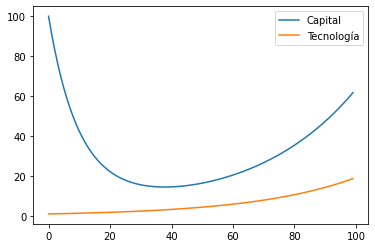

In [5]:
# Definir parámetros
s = 0.3 # tasa de ahorro
n = 0.02 # tasa de crecimiento poblacional
g = 0.03 # tasa de crecimiento tecnológico
d = 0.05 # tasa de depreciación del capital
alpha = 0.3 # participación del capital en la producción

# Definir la función de producción Cobb-Douglas
def cobb_douglas(k, a):
    return k**alpha * a**(1-alpha)

# Definir la ecuación de Solow-Swan
def solow_swan(k, a):
    y = cobb_douglas(k, a)
    return s*y - (n+g+d)*k

# Definir valores iniciales
k0 = 100 # stock inicial de capital
a0 = 1 # nivel inicial de tecnología

# Definir el período de tiempo y crear listas para almacenar los valores de capital y tecnología
t = 100
k = [k0]
a = [a0]

# Iterar la ecuación de Solow-Swan
for i in range(1, t):
    k_next = k[i-1] + solow_swan(k[i-1], a[i-1])
    a_next = (1+g)*a[i-1]
    k.append(k_next)
    a.append(a_next)

# Graficar la evolución del capital y la tecnología a lo largo del tiempo
import matplotlib.pyplot as plt
plt.plot(k)
plt.plot(a)
plt.legend(['Capital', 'Tecnología'])
plt.show()


In [6]:
# Definir los parámetros del modelo
s = 0.3 # tasa de ahorro
d = 0.1 # tasa de depreciación

# Definir la función de producción
def f(k):
    return k**0.5

# Definir la ecuación de Solow-Swan
def solow_swan(k):
    return s*f(k) + (1-d)*k

# Calcular el stock de capital en el período t+1 a partir del stock de capital en el período t
k = 10 # stock de capital en el período t
k_next = solow_swan(k) # stock de capital en el período t+1
print("Stock de capital en el período t: ", k)
print("Stock de capital en el período t+1: ", k_next)

Stock de capital en el período t:  10
Stock de capital en el período t+1:  9.948683298050513


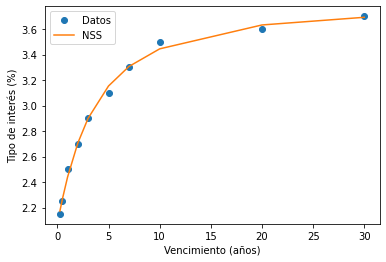

In [7]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Datos de tipos de interés de ejemplo en un DataFrame
df = pd.DataFrame({'maturity': [0.25, 0.5, 1, 2, 3, 5, 7, 10, 20, 30],
                   'yield': [2.15, 2.25, 2.5, 2.7, 2.9, 3.1, 3.3, 3.5, 3.6, 3.7]})

# Función de ajuste del modelo NSS
def nss(t, beta0, beta1, beta2, beta3, tau1, tau2):
    y = beta0 + beta1*(1-np.exp(-t/tau1))/(t/tau1) + \
        beta2*((1-np.exp(-t/tau1))/(t/tau1)-np.exp(-t/tau1)) + \
        beta3*((1-np.exp(-t/tau2))/(t/tau2)-np.exp(-t/tau2))
    return y

# Función de error
def error_function(params):
    y_hat = nss(df['maturity'], *params)
    error = np.sqrt(np.mean((df['yield'] - y_hat)**2))
    return error

# Optimización de parámetros
initial_guess = [2, -1, 0.5, -0.5, 1, 10]
result = minimize(error_function, initial_guess, method='Nelder-Mead')
beta0, beta1, beta2, beta3, tau1, tau2 = result.x

# Generación de la curva de tipos de interés
curve = nss(df['maturity'], beta0, beta1, beta2, beta3, tau1, tau2)

# Agregar la curva NSS al DataFrame
df['NSS'] = curve

# Gráfica de la curva
import matplotlib.pyplot as plt
plt.plot(df['maturity'], df['yield'], 'o', label='Datos')
plt.plot(df['maturity'], df['NSS'], label='NSS')
plt.legend()
plt.xlabel('Vencimiento (años)')
plt.ylabel('Tipo de interés (%)')
plt.show()


In [8]:
import requests
from bs4 import BeautifulSoup

# URL de las tasas de interés de Investing.com
url = "https://www.investing.com/rates-bonds/u.s.-10-year-bond-yield-historical-data"
url_ca = "https://www.investing.com/rates-bonds/canada-10-year-bond-yield-historical-data"

# Descargar la página web y extraer el contenido HTML
html_content = requests.get(url).text
html_content_ca = requests.get(url_ca).text

# Analizar el contenido HTML con Beautiful Soup
soup = BeautifulSoup(html_content, "html.parser")
soup_ca = BeautifulSoup(html_content_ca, "html.parser")

# Encontrar la tabla que contiene los datos de T-Bill 10Y de EE. UU.
table = soup.find("table", {"id": "curr_table"})
table_ca = soup_ca.find("table", {"id": "curr_table"})

# Extraer los datos de la tabla
data = []
data_ca = []

for row in table.find_all("tr"):
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    data.append(cols)

for row in table_ca.find_all("tr"):
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    data_ca.append(cols)

# Imprimir los datos
print("T-Bill 10Y de EE. UU.")
for row in data:
    print(row)

print("T-Bill 10Y de Canadá")
for row in data_ca:
    print(row)


AttributeError: 'NoneType' object has no attribute 'find_all'

In [ ]:
!pip install investpy
import investpy
import pandas as pd

# Obtener los datos de las rentabilidades de los bonos del gobierno canadiense a 10 y 2 años
bond_data = investpy.get_bond_historical_data(bond='Canada 10Y', from_date='01/01/2010', to_date='31/12/2021')
# bond_data_2 = investpy.get_bond_historical_data(bond='Canada 2Y', from_date='01/01/2010', to_date='31/12/2021')

# Crear un dataframe para almacenar los datos
df = pd.DataFrame()

# Agregar los datos de la rentabilidad de los bonos a 10 años al dataframe
df['Canada 10Y Bond Yield'] = bond_data['Close']

# Agregar los datos de la rentabilidad de los bonos a 2 años al dataframe
# df['Canada 2Y Bond Yield'] = bond_data_2['Close']

# Mostrar los datos del dataframe
print(df)

### Sectores industriales
___

In [153]:
df_mcompanies = pd.read_excel(r'C:\Users\Admin\Desktop\Portfolio\Capital Markets\Pareto_companies.xlsx',index_col=0)
df_mcompanies.reset_index(drop=False, inplace=True)
df_mcompanies
# df.to_excel(r'C:\Users\Admin\Desktop\Portfolio\Storage_process\Gmail\Output\gmail_processed_data.xlsx') #para el historico

sector                                    name     ticker
0    Basic Materials           Wheaton Precious Metals Corp.        WPM
1    Basic Materials                               Vale S.A.       VALE
2    Basic Materials                  Teck Resources Limited  TECK-A.TO
3    Basic Materials  China Petroleum & Chemical Corporation        SNP
4    Basic Materials             Southern Copper Corporation       SCCO
..               ...                                     ...        ...
109       Technology                           Broadcom Inc.       AVGO
110       Technology                       ASML Holding N.V.       ASML
111       Technology            Advanced Micro Devices, Inc.        AMD
112       Technology                              Adobe Inc.       ADBE
113       Technology                              Apple Inc.       AAPL

[114 rows x 3 columns]

In [163]:
df = df_mcompanies[(df_mcompanies['sector'] == 'Comunications')]
index_list = df['ticker'].tolist()

variables = index_list
start = datetime.datetime(2020,3,13)
end = datetime.datetime.today()
# end = datetime.datetime(2023,1,31)

# df_daily_quote = yf.download(variables, start, end)[['Adj Close', 'Volume']]
df_daily_quote = yf.download(variables, start, end)[['Adj Close']]

df_daily_quote = df_daily_quote.fillna(method="bfill")
df_daily_quote = df_daily_quote.fillna(method="ffill")

HPR = (df_daily_quote.pct_change()+1).cumprod()-1
HPR = HPR.fillna(method="bfill") 
HPR = HPR.fillna(method="ffill")

HPR.columns = HPR.columns.map('_'.join)
display(HPR)

# Plot
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(rows=1, cols=1,
                    specs=[
                           [{"secondary_y": True}], 
                          #  [{"secondary_y": True}],
                          #  [{"secondary_y": True}],
                          #  [{"secondary_y": True}],
                          ],                 
                    shared_xaxes=True,
                    vertical_spacing=0.05,
                   )


for n in range(0,len(HPR.columns)):
#     fig.add_trace(go.Scatter(x=HPR.index, y=HPR[HPR.columns[n]], name=df.loc[df['ticker']], yaxis='y'))
    fig.add_trace(go.Scatter(x=HPR.index, y=HPR[HPR.columns[n]], name=df.loc[df['ticker']==HPR.columns[n], 'name'].values[0]),row=1, col=1, secondary_y=False,)

fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=False)
fig.update_layout(hovermode="x unified",
                  height=800,
                  # margin=dict(t=130, b=0, l=70, r=40), 
                  xaxis_title=' ', yaxis_title=" ",
                  # plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  template='plotly_dark',
                  title="Stock exchanges performance", 
                  title_font_size=20,
                  legend_title_text='Financials'
                  # legend=dict(orientation="h", yanchor="bottom", y=1.2, xanchor="left", x=0.45)
                 )

# Mostrar figura
fig.show()

[*********************100%***********************]  5 of 5 completed


Adj Close_0700.HK  Adj Close_GOOGL  Adj Close_META  Adj Close_T  \
Date                                                                          
2020-03-13          -0.063562        -0.116341       -0.142530    -0.077168   
2020-03-16          -0.063562        -0.116341       -0.142530    -0.077168   
2020-03-17          -0.041644        -0.079233       -0.122504    -0.021178   
2020-03-18          -0.084931        -0.101361       -0.136951    -0.046997   
2020-03-19          -0.060274        -0.084495       -0.100716    -0.096316   
...                       ...              ...             ...          ...   
2023-03-29           0.065061         0.669975        0.205955    -0.061200   
2023-03-30           0.065614         0.661739        0.220578    -0.057247   
2023-03-31           0.067828         0.708516        0.244656    -0.048848   
2023-04-03           0.074471         0.718893        0.251292    -0.041930   
2023-04-04           0.065614         0.724822        0.260982    -0.029577   

            Adj Close_VZ  
Date                      
2020-03-13     -0.058704  
2020-03-16     -0.058704  
2020-03-17      0.002585  
2020-03-18      0.002769  
2020-03-19     -0.010153  
...                  ...  
2023-03-29     -0.178245  
2023-03-30     -0.174401  
2023-03-31     -0.169490  
2023-04-03     -0.162442  
2023-04-04     -0.153259  

[790 rows x 5 columns]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [6]:
import yfinance as yf
import pandas as pd

# Descargar datos históricos de AAPL y NASDAQ
start_date = '2019-04-06'
end_date = '2021-04-06'
aapl = yf.download('AAPL', start=start_date, end=end_date)
nasdaq = yf.download('^IXIC', start=start_date, end=end_date)

# Obtener el porcentaje de cambio diario de AAPL y NASDAQ
aapl_daily_returns = aapl['Adj Close'].pct_change()
nasdaq_daily_returns = nasdaq['Adj Close'].pct_change()

# rolling_cov = df['AAPL'].rolling(window=365).cov(df['^IXIC'].rolling(window=365))
# rolling_var = df['^IXIC'].rolling(window=365).var()
# beta = rolling_cov / rolling_var


# Calcular el beta
covariance = aapl_daily_returns.cov(nasdaq_daily_returns)
variance = nasdaq_daily_returns.var()
beta = covariance / variance

# Obtener los datos de los últimos 365 días
last_year = aapl.iloc[-365:]

# Calcular el beta diario en los últimos 365 días
daily_returns = last_year['Adj Close'].pct_change()
covariances = daily_returns.cov(nasdaq_daily_returns[-365:])
variance = nasdaq_daily_returns[-365:].var()
betas = covariances / variance
betas
# Graficar el beta diario en los últimos 365 días
# pd.Series(betas).plot(figsize=(10, 6), title='Evolución del beta diario en los últimos 365 días')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1.1670149374655838

In [ ]:
df.groupby('Hobbies', as_index=False).agg({'Hobbies' : 'first', 'Name' : ' '.join})

In [95]:
HPR.to_excel(r'C:\Users\Admin\Desktop\Portfolio\Capital Markets\HPR.xlsx')

In [98]:
import numpy as np

n = 4
matriz = np.random.randint(2, size=(n, n))
np.fill_diagonal(matriz, 0)
matriz

array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 0]])

A  B  C  D
A  0  1  1  1
B  0  0  0  0
C  0  0  0  0
D  0  1  0  0

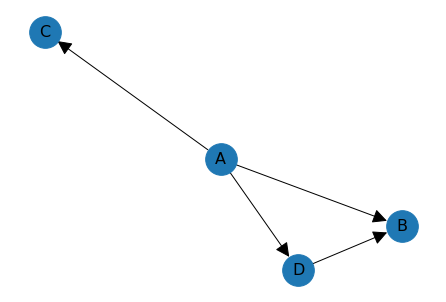

In [104]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Definir matriz de adyacencia
n = 4
matriz = np.random.randint(2, size=(n, n))
np.fill_diagonal(matriz, 0)

# Crear grafo a partir de la matriz de adyacencia
G = nx.DiGraph(matriz)

# Asignar etiquetas a los nodos
nombres_nodos = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
G = nx.relabel_nodes(G, nombres_nodos)

# Dibujar grafo
posiciones = nx.spring_layout(G)
nx.draw(G, posiciones, with_labels=True, font_size=16, node_size=1000, arrowsize=30)

# Mostrar grafo
df = pd.DataFrame(matriz,
                  index=nombres_nodos.values(),
                  columns=nombres_nodos.values())
display(df)
plt.show()


In [105]:
df_melted = df.reset_index().melt(id_vars='index')
df_melted.columns = ['from', 'to', 'weight']
df_melted

from to  weight
0     A  A       0
1     B  A       0
2     C  A       0
3     D  A       0
4     A  B       1
5     B  B       0
6     C  B       0
7     D  B       1
8     A  C       1
9     B  C       0
10    C  C       0
11    D  C       0
12    A  D       1
13    B  D       0
14    C  D       0
15    D  D       0

In [ ]:
# https://www.investopedia.com/articles/mortgages-real-estate/10/real-estate-investment-trust-reit.asp
# https://www.investopedia.com/terms/r/reit.asp

In [ ]:
# Table_Bonds_2=pd.pivot_table(DB_Bonds_2, values=['Open'], index='Date', columns=["Variable"], aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)
# Table_Bonds_2 =Table_Bonds_2.fillna(method='ffill')
# Table_Bonds_2

In [ ]:
# from investiny import historical_data
# from investiny import historical_data, search_assets

# search_results = search_assets(query="AAPL", limit=1, type="Stock", exchange="NEO")

# search_results
# # investing_id = int(search_results[0]["ticker"]) # Assuming the first entry is the desired one (top result in Investing.com)
# # data = historical_data(investing_id=investing_id, from_date="09/01/2022", to_date="10/01/2022")
# # df = pd.DataFrame(data)
# # df

In [ ]:
# # !pip install investiny

# from investiny import search_assets

# results = search_assets(query="Peru 10Y", limit=1, type="Bond", exchange="NASDAQ") # Returns a list with all the results found in Investing.com

In [ ]:
# from investiny import historical_data, search_assets

# search_results = search_assets(query="Peru 10Y", limit=1, type="Bond", exchange="NASDAQ")
# investing_id = int(search_results[0]["ticker"]) # Assuming the first entry is the desired one (top result in Investing.com)

# data = historical_data(investing_id=investing_id, from_date="09/01/2022", to_date="10/01/2022")
# data

In [ ]:
# # write a defined integral function to integrate the function f(x) = x^2 from 0 to 1 using sympy 
# from sympy import *
# x = Symbol('x')
# f = x**3/5
# # integrate(f, (x, 10, 100))
# f



In [ ]:
# ver como le esta yendo a la empresas de consumo defensivo y de consumo cíclico